                            ADITYA MANWATKAR (3rd Year AI & DS,33)

# Practical No. 8
### Aim: Clustering Income using Hierarchical Clustering

#### *Importing essential Liabraries*

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### *Loading Dataset*

In [14]:
df=pd.read_csv("dataset income.csv")

In [15]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


#### *Encoding Gender Field*

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.00,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


## Dendrogram Data Visualization

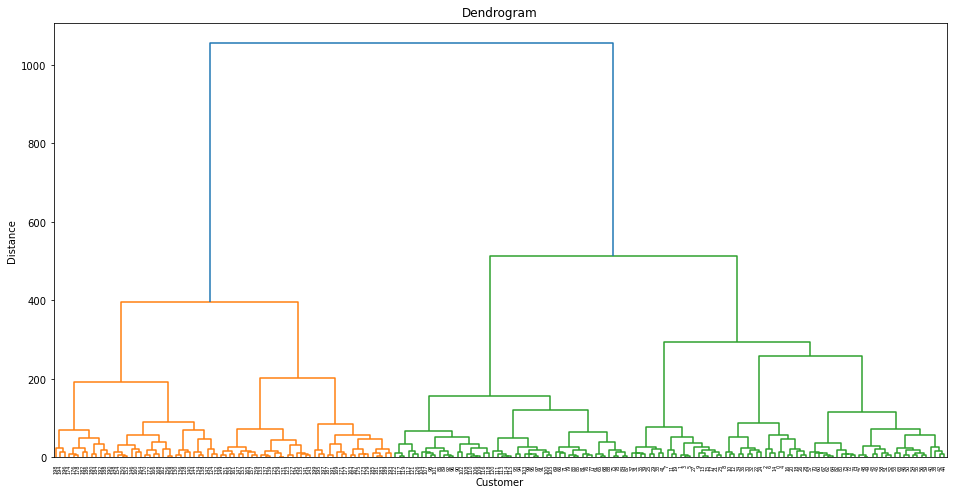

In [20]:
import scipy.cluster.hierarchy as clus
plt.figure(1,figsize=(16,8))
dendrogram=clus.dendrogram(clus.linkage(df,method='ward'))
plt.title("Dendrogram")
plt.xlabel('Customer')
plt.ylabel('Distance')
plt.show()

### Fitting the Hierarchical Clustering to the dataset with n=5

In [21]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_means=model.fit_predict(df)
y_means

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

## Visualizing the number of cluster n=5

Cluster 1: Customer with High income and Low spent

Cluster 2: Customer with High income and High spent

Cluster 3: Customer with Medium income and Medium spent

Cluster 4: Customer with Low income and Low spent

Cluster 5: Customer with Low income and High spent

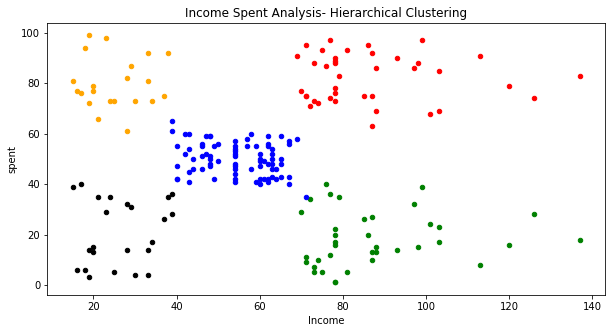

In [24]:
X=df.iloc[:,[3,4]].values
plt.figure(1,figsize=(10,5))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=20,c='green',label='cluster 1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=20,c='red',label='cluster 2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=20,c='blue',label='cluster 3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=20,c='black',label='cluster 4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=20,c='orange',label='cluster 5')
plt.title("Income Spent Analysis- Hierarchical Clustering")
plt.xlabel('Income')
plt.ylabel('spent')
plt.show()